# Random Forest - Classification

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.




Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [34]:
df = pd.read_csv("penguins_size.csv")

In [35]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Exploratory Data Analysis and Visualization

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.0,43.994311,5.460521,32.1,39.5,44.5,48.575,59.6
culmen_depth_mm,334.0,17.160479,1.967909,13.1,15.6,17.3,18.700,21.5
flipper_length_mm,334.0,201.014970,14.022175,172.0,190.0,197.0,213.000,231.0
body_mass_g,334.0,4209.056886,804.836129,2700.0,3550.0,4050.0,4793.750,6300.0


In [38]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(df[feature].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '.']


In [39]:
df[df["sex"]== "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [40]:
df.drop(index=336, inplace=True)

In [41]:
for feature in df:
    if df[feature].dtype=="object":
        print(df[feature].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE']


In [42]:
df["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

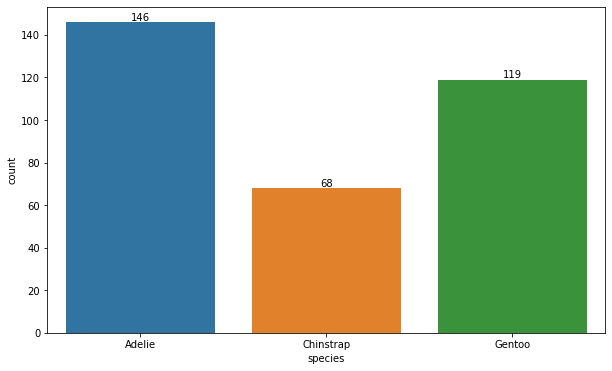

In [43]:
ax = sns.countplot(x="species", data = df)
ax.bar_label(ax.containers[0]);

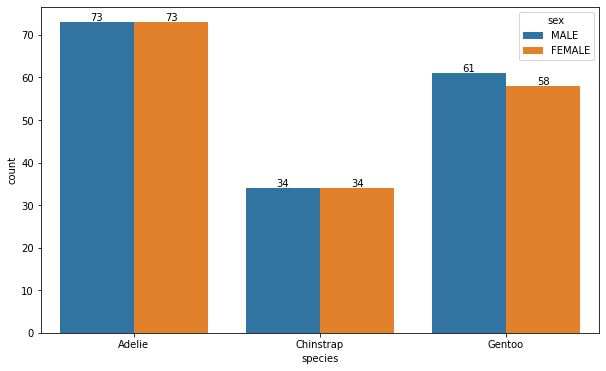

In [44]:
ax = sns.countplot(x="species", data = df, hue = "sex")
for p in ax.containers:
    ax.bar_label(p)

<Figure size 864x432 with 0 Axes>

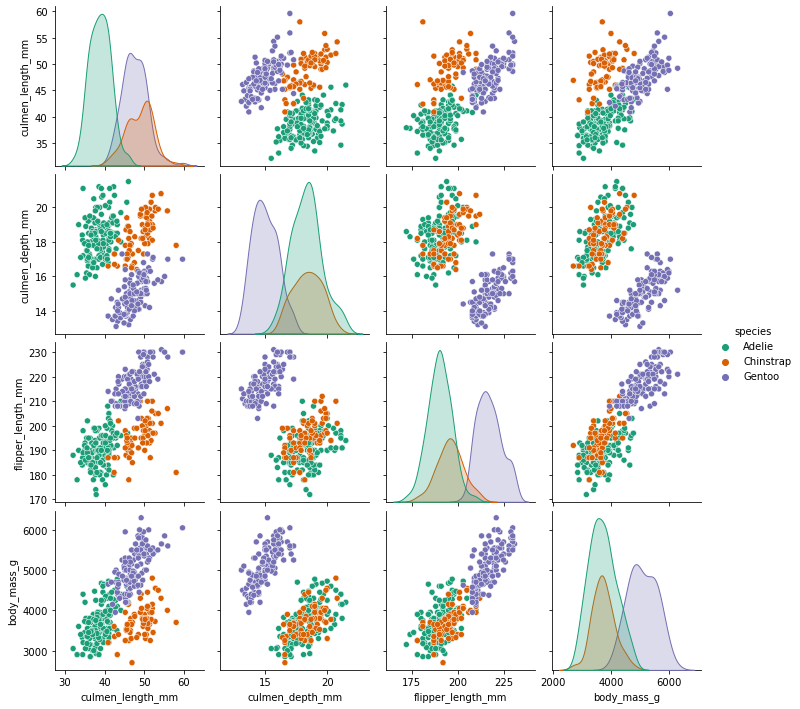

In [45]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2')

In [46]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


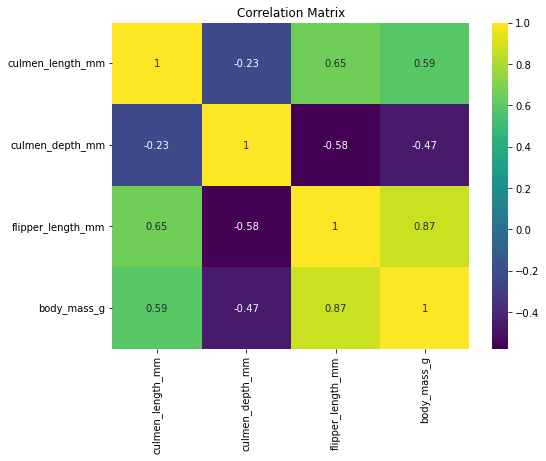

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

## OrdinalEncoder

https://bookdown.org/max/FES/categorical-trees.html

https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

## Modeling with Pipeline

## Train | Test Split

In [48]:
X = df.drop(columns="species")
y = df['species']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [50]:
X_train.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
314,Biscoe,44.5,14.7,214.0,4850.0,FEMALE
248,Biscoe,48.2,14.3,210.0,4600.0,FEMALE


In [51]:
X_test.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
171,Dream,49.2,18.2,195.0,4400.0,MALE
250,Biscoe,47.3,15.3,222.0,5250.0,MALE


In [52]:
cat = X_train.select_dtypes("object").columns
cat

Index(['island', 'sex'], dtype='object')

In [53]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF_model', RandomForestClassifier(random_state=101))])

## Model Performance on Classification Tasks

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score,f1_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Random Forest

In [56]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [57]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [58]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[31  0  0]
 [ 0 16  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        16
      Gentoo       1.00      1.00      1.00        20

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



In [59]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.985185
test_precision_micro    0.985185
test_recall_micro       0.985185
test_f1_micro           0.985185
dtype: float64

In [60]:
X_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
314,Biscoe,44.5,14.7,214.0,4850.0,FEMALE
248,Biscoe,48.2,14.3,210.0,4600.0,FEMALE
199,Dream,49.0,19.6,212.0,4300.0,MALE
182,Dream,40.9,16.6,187.0,3200.0,FEMALE
238,Biscoe,46.2,14.5,209.0,4800.0,FEMALE
...,...,...,...,...,...,...
81,Torgersen,42.9,17.6,196.0,4700.0,MALE
93,Dream,39.6,18.1,186.0,4450.0,MALE
69,Torgersen,41.8,19.4,198.0,4450.0,MALE
335,Biscoe,55.1,16.0,230.0,5850.0,MALE


In [61]:
y_train

314       Gentoo
248       Gentoo
199    Chinstrap
182    Chinstrap
238       Gentoo
         ...    
81        Adelie
93        Adelie
69        Adelie
335       Gentoo
16        Adelie
Name: species, Length: 266, dtype: object

## microlar -------> accuracy ile aynı...

## Evaluating ROC Curves and AUC

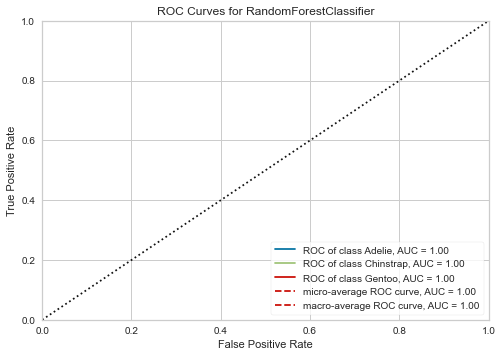

In [62]:
from yellowbrick.classifier import ROCAUC

model = pipe_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

### RF Model Feature Importance

In [63]:
pipe_model["RF_model"].feature_importances_ # rf_model.feature_importances_

array([0.09693939, 0.00689311, 0.34269914, 0.16492234, 0.27909022,
       0.10945581])

In [64]:
features = list(X_train.select_dtypes("object").columns) + list(X_train.select_dtypes("number").columns)
features

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [65]:
rf_feature_imp = pd.DataFrame(data = pipe_model["RF_model"].feature_importances_, index = features, #index=X.columns
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
culmen_length_mm,0.342699
flipper_length_mm,0.279090
culmen_depth_mm,0.164922
body_mass_g,0.109456
island,0.096939
sex,0.006893


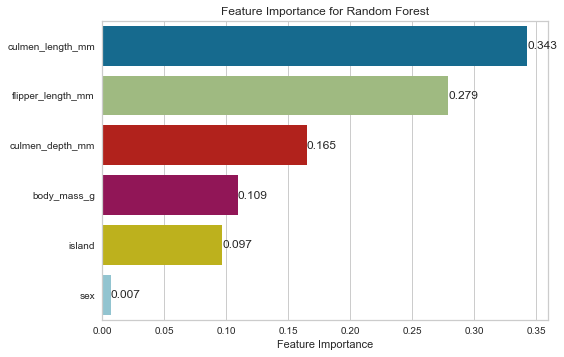

In [66]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

## Understanding Hyperparameters

In [67]:
from sklearn.tree import plot_tree

def report_model(model, number_of_tree):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree], feature_names=features, #features_names=X.columns
          class_names=df.species.unique(),
          filled = True,
          fontsize = 8);

In [68]:
RF_model = RandomForestClassifier(max_samples=0.5) #The sub-sample size is controlled with the max_samples parameter
operations = [("OrdinalEncoder", column_trans), ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations) # pruned_tree = RandomForestClassifier(max_samples=0.5)

pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF_model', RandomForestClassifier(max_samples=0.5))])



Test Set
[[31  0  0]
 [ 0 16  0]
 [ 0  0 20]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        16
      Gentoo       1.00      1.00      1.00        20

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Train Set
[[115   0   0]
 [  1  51   0]
 [  0   0  99]]


              precision    recall  f1-score   support

      Adelie       0.99      1.00      1.00       115
   Chinstrap       1.00      0.98      0.99        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      0.99      1.00       266
weighted avg       1.00      1.00      1.00       266



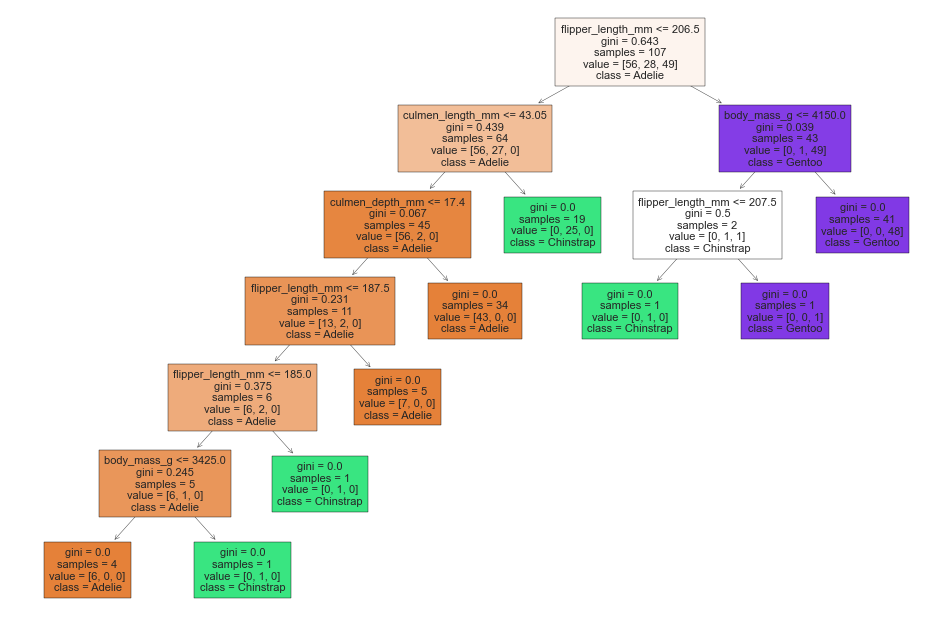

In [69]:
report_model(pruned_tree, 50)

# gridsearchcv eklenmeliydi onu ekleyelim.değerlerimiz her ne kadar yüksek çıkmış olsa da.belki aynı performansı veren daha az komplex bir model çıkabilir gridsearch ile.

## Final Model and Prediction

In [70]:
X = df.drop(columns=["species"])
y = df['species']

In [71]:
X.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


In [72]:
import mlnotify

In [74]:

%%notify
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline


operations = [("transformer", column_trans), ("RF", RandomForestClassifier(random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X, y)

                                     
                                     
    █▀▀▀▀▀█  ▀▀█▄▄█ █▀█ ▄ █▀▀▀▀▀█    
    █ ███ █ ▄▀██ ▄█ █▄▄▄▄ █ ███ █    
    █ ▀▀▀ █ ▀▄█ ▀▄█ ▀█▀▀▀ █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ ▀▄▀ █ █▄█ █▄▀ ▀▀▀▀▀▀▀    
    ▀▀▄ ▄█▀█ ▀█ ▀█ ▄ ▀▄▄▀▄ ▄█▀▄▄     
    ▀ ▄ ▄▄▀█ ▀▄█▀  ▀▀▀▀▄█  █ ▄       
    ▀▀█ █▀▀▄▀██ ▄ █▄█▄▄▄█ ██▄  ▄█    
    ▀ █ ▀█▀ ▄▀▀ ▄ ▄█ ▀  ▄██▄ ▀█ ▄    
    █▄▄█▀ ▀█▀▄▀ ▀▀▄▄▄█▄▄█ ▄▄▄▀█▄▄    
    █▀▄ ▀▄▀ ▄▀▄▄▀▀ ▀ ▀ ▀  ██▀▀  ▀    
    ▀  ▀ ▀▀ █  ▀▄█ ▄ ██ █▀▀▀█▄▀▀▀    
    █▀▀▀▀▀█ ██  ▄  ▀▀▀ ██ ▀ █▀▀▄▄    
    █ ███ █  █ ▀▀ ███  ▀██▀▀▀█▄▀▄    
    █ ▀▀▀ █ ▄▀▀█▀ ▀█▄ ▄▀▀ ▀████▀▄    
    ▀▀▀▀▀▀▀ ▀▀ ▀▀  ▀▀▀     ▀  ▀      
                                     
                                     


`before` hook was already called


https://mlnotify.aporia.com/training/780485

Scan the QR code or enter the url to get a notification when your training is done


                                     
                                     
    █▀▀▀▀▀█  ▀▀█▄▄█ █▀█ ▄ █▀▀▀▀▀█    
    █ ███ █ ▄▀██ ▄█ █▄▄▄▄ █ ███ █    
    █ ▀▀▀ █ ▀▄█ ▀ █ ▀█▀▀▀ █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ ▀▄▀ █ █▄█ █▄▀ ▀▀▀▀▀▀▀    
    ▀█ ▄▄▀▀▀▄▀█ ▀▀ ▄ ▀▄▄▀▄ ▄█▀▄▄     
    ▄▀▀█ █▀▀█▀▄█▀ ▄▀▀▀▀▄█  █ ▄       
    █▄█▄▄▀▀▀ ▀█ ▄▄█▄█▄▄▄█ ██▄  ▄█    
    ▄ █▄██▀▄▄ █ ▄ ▄█ ▀  ▄██▄ ▀█ ▄    
    █▄▄█ █▀█▄ ▄ ▀▀▄▄▄█▄▄█ ▄▄▄▀█▄▄    
    █▀ ▀ █▀▀▄ ▄▄▀▀▀▀ ▀ ▀  ██▀▀  ▀    
    ▀    ▀▀▀▄██▀▄█ ▄ ██ █▀▀▀█▄▀▀▀    
    █▀▀▀▀▀█ █▀  ▄ ▄▀▀▀ ██ ▀ █▀▀▄▄    
    █ ███ █  █▀▀▀ ███  ▀██▀▀▀█▄▀▄    
    █ ▀▀▀ █ ▄▄▀█▀▀ █▄ ▄▀▀ ▀████▀▄    
    ▀▀▀▀▀▀▀ ▀▀▀▀▀  ▀▀▀     ▀  ▀      
                                     
                                     
https://mlnotify.aporia.com/training/518093

Scan the QR code or enter the url to get a notification when your training is done


                  

https://mlnotify.aporia.com/training/021998

Scan the QR code or enter the url to get a notification when your training is done


                                     
                                     
    █▀▀▀▀▀█  ▀▀█▄▄█ █▀█ ▄ █▀▀▀▀▀█    
    █ ███ █ ▄▀██ ▄█ █▄▄▄▄ █ ███ █    
    █ ▀▀▀ █ ▀▄█ ▀▄▀ ▀█▀▀▀ █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ ▀▄▀ █ ▀▄█ █▄▀ ▀▀▀▀▀▀▀    
    ██  ▄█▀▀▄▀█ ▀▀ ▄ ▀▄▄▀▄ ▄█▀▄▄     
    ██▀█▀▄▀ ▄▀▄█▀▀█▀▀▀▀▄█  █ ▄       
    ▄▀ ▄▀▀▀▄ ▀█ ▄ █▄█▄▄▄█ ██▄  ▄█    
    ▀█▄██ ▀▄▀█▀ ▄ ▀█ ▀  ▄██▄ ▀█ ▄    
    █▄██▄▄▀▀▀▀▄ ▀▀▄▄▄█▄▄█ ▄▄▄▀█▄▄    
    █▀ ▄█▀▀▀▀  ▄▀ █▀ ▀ ▀  ██▀▀  ▀    
    ▀ ▀ ▀ ▀ █▀▄▀▄▀ ▄ ██ █▀▀▀█▄▀▀▀    
    █▀▀▀▀▀█ ██▄ ▄▀ ▀▀▀ ██ ▀ █▀▀▄▄    
    █ ███ █  ▀▀▀▀ ███  ▀██▀▀▀█▄▀▄    
    █ ▀▀▀ █ ▄█▀█▀▀▀█▄ ▄▀▀ ▀████▀▄    
    ▀▀▀▀▀▀▀ ▀ ▀▀▀  ▀▀▀     ▀  ▀      
                                     
                                     
https://mlnotify.aporia.com/training/275327

Scan the QR code or enter the url to get a notification when your training is done


                  

https://mlnotify.aporia.com/training/150303

Scan the QR code or enter the url to get a notification when your training is done


                                     
                                     
    █▀▀▀▀▀█  ▀▀█▄▄█ █▀█ ▄ █▀▀▀▀▀█    
    █ ███ █ ▄▀██ ▄█ █▄▄▄▄ █ ███ █    
    █ ▀▀▀ █ ▀▄█ ▀▄▀ ▀█▀▀▀ █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ ▀▄▀ █ █▄█ █▄▀ ▀▀▀▀▀▀▀    
    ▀█▄ ▄▀▀▀ ▀█ ▀█ ▄ ▀▄▄▀▄ ▄█▀▄▄     
    █▄ ▀ ▀▀█ ▀▄█▀  ▀▀▀▀▄█  █ ▄       
    ▄▄▀ █ ▀ █▀█ ▄ █▄█▄▄▄█ ██▄  ▄█    
     █▀▀█▄▀  ▀▄ ▄▀▄█ ▀  ▄██▄ ▀█ ▄    
    ▄▀▀▀▀ ▀▀▀▀█ ▀▀▄▄▄█▄▄█ ▄▄▄▀█▄▄    
    █▀▄ ▄▀▀▄▀▀▀▄▀ █▀ ▀ ▀  ██▀▀  ▀    
    ▀   ▀ ▀ ▄▀▀▀▄▀ ▄ ██ █▀▀▀█▄▀▀▀    
    █▀▀▀▀▀█ █▄▀ ▄▀ ▀▀▀ ██ ▀ █▀▀▄▄    
    █ ███ █  █▄▀▀▄███  ▀██▀▀▀█▄▀▄    
    █ ▀▀▀ █ ▄ ██▀ ▄█▄ ▄▀▀ ▀████▀▄    
    ▀▀▀▀▀▀▀ ▀▀▀▀▀  ▀▀▀     ▀  ▀      
                                     
                                     
https://mlnotify.aporia.com/training/382328

Scan the QR code or enter the url to get a notification when your training is done


                  

https://mlnotify.aporia.com/training/751963

Scan the QR code or enter the url to get a notification when your training is done


                                     
                                     
    █▀▀▀▀▀█ ▀▀   █  ▄▄▀▀▀ █▀▀▀▀▀█    
    █ ███ █ █▄ █▀█▀█ ▄██  █ ███ █    
    █ ▀▀▀ █ ▀█▀▀▄ ▄▀█▄▄█  █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ ▀▄▀▄▀ ▀▄█▄▀▄█ ▀▀▀▀▀▀▀    
    ▀█▀█▄ ▀▄█▄    ▄▀█▀███▀▄▄█▀▀ █    
    ▄▀█ ▄▄▀▄   ▄▄▄█ █ ▄ ▄▀▄▄█ ▀▀▄    
    ▀█▀▀▄ ▀█ ▀▄█ ▀ ▄▄▀ █  ▄  ▀█▄▄    
      ▀▀▀▀▀ ██▄ █▀█ █▀▀▀   ▄▀ ▀█▀    
     █▄█▀▄▀ ▀▀▀▀▄███ ▄▀ ▄▀ █▀█▄█     
    ▀ ▀▄▄█▀ █ ▀▀█▀█▀▀▄▄ █ ▄ █ █      
     ▀  ▀ ▀▀▄▄▄▀█ ▄▀██▄▀█▀▀▀███▄▄    
    █▀▀▀▀▀█  █▄▀▀▄▄ █ █▀█ ▀ ██ █     
    █ ███ █ ▄▀▄▄██ █▄█▄ ▀█▀██▄▀▀█    
    █ ▀▀▀ █ █▄▄█ ▀▄ ▀ █ ██▄█▄▄▀▄▀    
    ▀▀▀▀▀▀▀ ▀▀▀   ▀ ▀ ▀ ▀▀  ▀  ▀     
                                     
                                     
https://mlnotify.aporia.com/training/715659

Scan the QR code or enter the url to get a notification when your training is done


                  

https://mlnotify.aporia.com/training/329368

Scan the QR code or enter the url to get a notification when your training is done


                                     
                                     
    █▀▀▀▀▀█ ▀▀▀█▄ ▀ █▀█▄  █▀▀▀▀▀█    
    █ ███ █  ▀▄█ ██ ▄▄▄█▄ █ ███ █    
    █ ▀▀▀ █  ▄▀█▀   █ ▀▀  █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ █▄▀ █▄▀▄█ █ █ ▀▀▀▀▀▀▀    
    ▀▀▄██ ▀▄ ▀▄ ▀  ▄▀▀▄█▀▄▀▄▄ ▄▄▀    
    █  █▀▄▀ ▄▀  ▀▀▄▀█▄▀▄▄ ▄  ▄▀ ▄    
    ▄ ▀█▄ ▀▀▀▀█ ▄▄▀▄█▄▄ ▀ ██▄▄▄▄█    
    ▀ ▄▄██▀█▀█▀ ▄▀██▀▀ ▀▄█▄▄  █ █    
    █▀▀▄▄ ▀█  ▀█▀██▄  ▄▄▄  ▀▄▀▄▄     
    ██▄▄▄▀▀ ▀ █▄▀█▀▀ ▀ █▄ ██▀█▄ ▀    
    ▀▀ ▀▀ ▀▀██ ▀▄  ▄▀██▀█▀▀▀██▀▀     
    █▀▀▀▀▀█  ▀▄█▄ █▀█▄ ██ ▀ █▀ ▄     
    █ ███ █ █▄█▀▀▄▀██  █▀█▀▀▀▀ ▀▄    
    █ ▀▀▀ █ ▄▀██▀  ██ ▄ ▀  ██▄█▀█    
    ▀▀▀▀▀▀▀ ▀▀  ▀ ▀▀▀   ▀            
                                     
                                     
https://mlnotify.aporia.com/training/174913

Scan the QR code or enter the url to get a notification when your training is done


                  

https://mlnotify.aporia.com/training/189131

Scan the QR code or enter the url to get a notification when your training is done


                                     
                                     
    █▀▀▀▀▀█  ▀▀█▄▄█ █▀█ ▄ █▀▀▀▀▀█    
    █ ███ █ ▄▀██ ▄█ █▄▄▄▄ █ ███ █    
    █ ▀▀▀ █ ▀▄█ ▀ ▀ ▀█▀▀▀ █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ ▀▄▀ █ █▄█ █▄▀ ▀▀▀▀▀▀▀    
    ▀█▄▄▄▀▀█▄▀█ ▀█ ▄ ▀▄▄▀▄ ▄█▀▄▄     
    ▄▄ ▄ ▀▀█▀▀▄█▀  ▀▀▀▀▄█  █ ▄       
    █ ▀ ▀▄▀▀▀██ ▄ █▄█▄▄▄█ ██▄  ▄█    
      ▄▄▀ ▀▄ ██ ▄▀▄█ ▀  ▄██▄ ▀█ ▄    
    █▀▀ ▄█▀█▀▄▄ ▀▀▄▄▄█▄▄█ ▄▄▄▀█▄▄    
    █▀▄▀██▀▀▄▄█▄▀▀ ▀ ▀ ▀  ██▀▀  ▀    
    ▀ ▀▀ ▀▀▀█ ▄▀▄█ ▄ ██ █▀▀▀█▄▀▀▀    
    █▀▀▀▀▀█ █ ▄ ▄  ▀▀▀ ██ ▀ █▀▀▄▄    
    █ ███ █  ▀ ▀▀ ███  ▀██▀▀▀█▄▀▄    
    █ ▀▀▀ █ ▄▀▄█▀  █▄ ▄▀▀ ▀████▀▄    
    ▀▀▀▀▀▀▀ ▀▀ ▀▀  ▀▀▀     ▀  ▀      
                                     
                                     
https://mlnotify.aporia.com/training/182481

Scan the QR code or enter the url to get a notification when your training is done


                  

https://mlnotify.aporia.com/training/960112

Scan the QR code or enter the url to get a notification when your training is done


                                     
                                     
    █▀▀▀▀▀█ ▀▀▀█▄ ▀ █▀█▄  █▀▀▀▀▀█    
    █ ███ █  ▀▄█ ██ ▄▄▄█▄ █ ███ █    
    █ ▀▀▀ █  ▄▀█▀ ▄ █ ▀▀  █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ █▄▀ █▄▀▄█ █ █ ▀▀▀▀▀▀▀    
    █▀▄▀▀ ▀  ▀▄ ▀  ▄▀▀▄█▀▄▀▄▄ ▄▄▀    
    ▀▄█▀▀▄▀▄▀▀  ▀ ▄▀█▄▀▄▄ ▄  ▄▀ ▄    
    ▀▀█▄▄▄▀▀▀██ ▄▄▀▄█▄▄ ▀ ██▄▄▄▄█    
     ▀██ ▄▀▄▀▀▄ ▄▀██▀▀ ▀▄█▄▄  █ █    
    █▄█▄▀█▀ ▀ ▀█▀▀█▄  ▄▄▄  ▀▄▀▄▄     
    ██▀██▄▀█▄▀█▄▀█▀▀ ▀ █▄ ██▀█▄ ▀    
    ▀▀ ▀ ▀▀▀█▄▀▀▄  ▄▀██▀█▀▀▀██▀▀     
    █▀▀▀▀▀█  ███▄▀ ▀█▄ ██ ▀ █▀ ▄     
    █ ███ █ ██▀▀▀ ▀██  █▀█▀▀▀▀ ▀▄    
    █ ▀▀▀ █ ▄▄▀█▀▀▄██ ▄ ▀  ██▄█▀█    
    ▀▀▀▀▀▀▀ ▀   ▀ ▀▀▀   ▀            
                                     
                                     
https://mlnotify.aporia.com/training/554168

Scan the QR code or enter the url to get a notification when your training is done


                  

https://mlnotify.aporia.com/training/927691

Scan the QR code or enter the url to get a notification when your training is done


                                     
                                     
    █▀▀▀▀▀█ █  ▄▄ ▀▀▄ █▄  █▀▀▀▀▀█    
    █ ███ █ ██▄ █▄▀▄▄▀▀▄  █ ███ █    
    █ ▀▀▀ █ ▄██ ▀▀ ▀▀█▀▄▄ █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ ▀ █▄▀ ▀ ▀▄▀▄▀ ▀▀▀▀▀▀▀    
    ▀▀▄▄██▀   ▀ ▀▄▀█▄▀▄▀ ▄▄█▄████    
    ▄██▄▄▀▀███▀ ▄▀▄█▄▄▄▄█▄█ █▄ ▄█    
      ▄▄ ▄▀ ▀▄▄▀▄ ▀█▄█▄ ▀▀▄▄▄▄▄█▄    
    █▀▀  ▄▀█▀▀██▀ ▄▀▀▄█  ▀▄▀█▀▀▄█    
    █ ▀█▄█▀ ██▄ ▀▄▀█▄█▄▀ ▀▄▄▄▄ █▄    
      ▀▄▄█▀▄██▀ ▄  █▄██ ▀▄▀▀▄ ▀▄█    
    ▀▀  ▀▀▀ ▄█▄▀▄▄▀█▄████▀▀▀█▀  █    
    █▀▀▀▀▀█ ▄▀ █▀ ██▄▄███ ▀ █▀▀ ▀    
    █ ███ █ ▀▀  ▀ ▀▄▄▀ █▀█▀▀▀▀  █    
    █ ▀▀▀ █ ▄ █ ▄ ▄▀██▀▀█▄   █▀██    
    ▀▀▀▀▀▀▀ ▀▀ ▀▀▀▀ ▀▀ ▀▀▀ ▀ ▀ ▀     
                                     
                                     
https://mlnotify.aporia.com/training/639059

Scan the QR code or enter the url to get a notification when your training is done


                  

https://mlnotify.aporia.com/training/152952

Scan the QR code or enter the url to get a notification when your training is done


                                     
                                     
    █▀▀▀▀▀█ ▀▀▀█▄ ▀ █▀█▄  █▀▀▀▀▀█    
    █ ███ █  ▀▄█ ██ ▄▄▄█▄ █ ███ █    
    █ ▀▀▀ █  ▄▀█▀▀  █ ▀▀  █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ █▄▀ █▄█▄█ █ █ ▀▀▀▀▀▀▀    
    ▀█ ██▄▀▄ ▀▄ ▀  ▄▀▀▄█▀▄▀▄▄ ▄▄▀    
     ▄ ███▀ ▀▀  ▀ ▄▀█▄▀▄▄ ▄  ▄▀ ▄    
     ██▄ █▀▀▄▀█ ▄▄▀▄█▄▄ ▀ ██▄▄▄▄█    
    ▀▄▄▀█▄▀▀▄▀▄ ▄▀██▀▀ ▀▄█▄▄  █ █    
    ███▄▀▄▀▄▄▀██▀▀█▄  ▄▄▄  ▀▄▀▄▄     
    ██ ▀█ ▀▀▄▄▀▄▀▄ ▀ ▀ █▄ ██▀█▄ ▀    
    ▀▀▀▀▀▀▀▀▄▀ ▀▄  ▄▀██▀█▀▀▀██▀▀     
    █▀▀▀▀▀█  █ █▄▀▀▀█▄ ██ ▀ █▀ ▄     
    █ ███ █ █▄█▀▀▄▀██  █▀█▀▀▀▀ ▀▄    
    █ ▀▀▀ █ ▄ ▀█▀ ▄██ ▄ ▀  ██▄█▀█    
    ▀▀▀▀▀▀▀ ▀ ▀ ▀ ▀▀▀   ▀            
                                     
                                     
https://mlnotify.aporia.com/training/854722

Scan the QR code or enter the url to get a notification when your training is done


                  

https://mlnotify.aporia.com/training/242924

Scan the QR code or enter the url to get a notification when your training is done


                                     
                                     
    █▀▀▀▀▀█ ▀▀▀█▄ ▀ █▀█▄  █▀▀▀▀▀█    
    █ ███ █  ▀▄█ ██ ▄▄▄█▄ █ ███ █    
    █ ▀▀▀ █  ▄▀█▀ ▄ █ ▀▀  █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ █▄▀ █▄▀▄█ █ █ ▀▀▀▀▀▀▀    
    ▀█ ▀█ ▀▄▄▀▄ ▀▄ ▄▀▀▄█▀▄▀▄▄ ▄▄▀    
    ▄▀█ ▄▄▀█▀▀  ▀ █▀█▄▀▄▄ ▄  ▄▀ ▄    
    ▄█  ██▀█ ██ ▄▄▀▄█▄▄ ▀ ██▄▄▄▄█    
    ▄▄█▄  ▀▄▄▀█ ▄▀▄█▀▀ ▀▄█▄▄  █ █    
    █▀▀▄▄█▀ ▄▀▀█▀██▄  ▄▄▄  ▀▄▀▄▄     
    ██▀█▄▀▀▀█▄▄▄▀██▀ ▀ █▄ ██▀█▄ ▀    
    ▀▀  ▀▀▀ █▀▀▀▄▄ ▄▀██▀█▀▀▀██▀▀     
    █▀▀▀▀▀█   ██▄ █▀█▄ ██ ▀ █▀ ▄     
    █ ███ █ █▄▀▀▀ ▀██  █▀█▀▀▀▀ ▀▄    
    █ ▀▀▀ █ ▄█▄█▀▀ ██ ▄ ▀  ██▄█▀█    
    ▀▀▀▀▀▀▀ ▀ ▀ ▀ ▀▀▀   ▀            
                                     
                                     
https://mlnotify.aporia.com/training/590899

Scan the QR code or enter the url to get a notification when your training is done


                  

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF', RandomForestClassifier(random_state=101))])

`after` hook was called prior to `before` hook


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
culmen_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


In [42]:
observations = {"island": ["Torgersen", "Biscoe"], "culmen_length_mm":[39, 48], "culmen_depth_mm":[18, 14],
               "flipper_length_mm":[180, 213], "body_mass_g":[3700, 4800], "sex":["MALE", "FEMALE"]}

obs = pd.DataFrame(observations)
obs

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39,18,180,3700,MALE
1,Biscoe,48,14,213,4800,FEMALE


In [43]:
pipe_model.predict(obs)

array(['Adelie', 'Gentoo'], dtype=object)

# DT and RF Scoring for diabetes dataset

In [44]:
df = pd.read_csv("diabetes.csv")

In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Cleaning Outliers

In [46]:
df=df[df.SkinThickness<70]
df=df[df.Glucose>0]
df=df[df.BloodPressure>35]
df=df[df.BMI>0]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               720 non-null    int64  
 1   Glucose                   720 non-null    int64  
 2   BloodPressure             720 non-null    int64  
 3   SkinThickness             720 non-null    int64  
 4   Insulin                   720 non-null    int64  
 5   BMI                       720 non-null    float64
 6   DiabetesPedigreeFunction  720 non-null    float64
 7   Age                       720 non-null    int64  
 8   Outcome                   720 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.2 KB


In [48]:
df.Outcome.value_counts()

0    473
1    247
Name: Outcome, dtype: int64

## Train | Test Split and Scalling

In [49]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Modelling and Model Performance

# burada categorik feature olmadığından ordinal encoder kullanmayacağız ona dikkat edelim.

### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[78 19]
 [19 28]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        97
           1       0.60      0.60      0.60        47

    accuracy                           0.74       144
   macro avg       0.70      0.70      0.70       144
weighted avg       0.74      0.74      0.74       144


Train_Set
[[376   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       200

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [53]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.753267
test_precision    0.646219
test_recall       0.630000
test_f1           0.634405
dtype: float64

# overfitting var ; gridsearch yapalım uygun hyperparametreler için.

In [54]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [3, 5, 6,7],
              "min_samples_split": [11, 12, 14,15,16,17]}

In [55]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)
dt_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2,cv=10).fit(X_train, y_train)

Fitting 10 folds for each of 1536 candidates, totalling 15360 fits


In [56]:
dt_grid_model.best_params_

{'max_depth': 4,
 'max_features': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 16,
 'splitter': 'random'}

In [57]:
dt_grid_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=3,
                       min_samples_leaf=7, min_samples_split=16,
                       random_state=101, splitter='random')

In [58]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[26 71]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.84      0.27      0.41        97
           1       0.37      0.89      0.53        47

    accuracy                           0.47       144
   macro avg       0.61      0.58      0.47       144
weighted avg       0.69      0.47      0.45       144


Train_Set
[[153 223]
 [ 11 189]]
              precision    recall  f1-score   support

           0       0.93      0.41      0.57       376
           1       0.46      0.94      0.62       200

    accuracy                           0.59       576
   macro avg       0.70      0.68      0.59       576
weighted avg       0.77      0.59      0.58       576



In [59]:
model = DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=3,
                       min_samples_leaf=7, min_samples_split=16,
                       random_state=101, splitter='random')

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.iloc[:,2:]

,test_accuracy,test_precision,test_recall,test_f1
1,0.620690,0.476190,1.00,0.645161
2,0.603448,0.465116,1.00,0.634921
3,0.551724,0.421053,0.80,0.551724
4,0.620690,0.475000,0.95,0.633333
5,0.620690,0.476190,1.00,0.645161
6,0.689655,0.531250,0.85,0.653846
7,0.561404,0.439024,0.90,0.590164
8,0.684211,0.526316,1.00,0.689655
9,0.561404,0.439024,0.90,0.590164
10,0.526316,0.410256,0.80,0.542373


In [60]:
df_scores.mean()[2:]

test_accuracy     0.604023
test_precision    0.465942
test_recall       0.920000
test_f1           0.617650
dtype: float64

# gridsearchcv skor ile aynı parametreler olmasına rağmen cross validation uyuşmadı bunun nedenine bakalım.

In [61]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve,\
                            average_precision_score

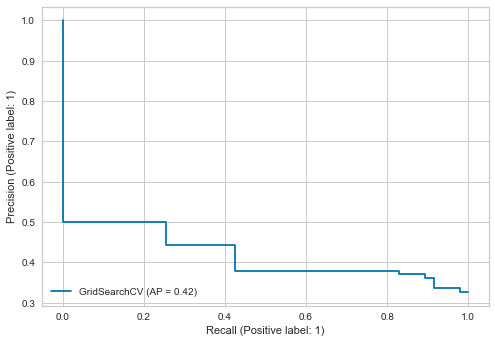

In [62]:
plot_precision_recall_curve(dt_grid_model, X_test, y_test);

## precisionn recall curvenin iyi çıkması için f1-score'u maximize edecek şekilde hareket etmeliyiz.gridsearchcv'de.

### Random Forest

In [63]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_model.fit(X_train, y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[79 18]
 [20 27]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        97
           1       0.60      0.57      0.59        47

    accuracy                           0.74       144
   macro avg       0.70      0.69      0.70       144
weighted avg       0.73      0.74      0.73       144


Train_Set
[[376   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       200

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [64]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.781004
test_precision    0.708739
test_recall       0.625000
test_f1           0.661902
dtype: float64

In [65]:
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.201809,0.015932,0.793103,0.700000,0.70,0.700000
2,0.158547,0.011956,0.862069,0.833333,0.75,0.789474
3,0.157490,0.014565,0.724138,0.600000,0.60,0.600000
4,0.148332,0.013990,0.758621,0.714286,0.50,0.588235
5,0.173972,0.010329,0.896552,0.888889,0.80,0.842105
6,0.211555,0.013196,0.793103,0.750000,0.60,0.666667
7,0.161523,0.013824,0.736842,0.666667,0.50,0.571429
8,0.145888,0.011404,0.824561,0.750000,0.75,0.750000
9,0.125039,0.010000,0.771930,0.684211,0.65,0.666667
10,0.127726,0.009002,0.649123,0.500000,0.40,0.444444


In [66]:
param_grid = {'n_estimators':[64, 128, 200],
             'max_features':[2, 4, "auto"],
             'max_depth':[2, 3, 4],
             'min_samples_split':[2, 3,4],
             'min_samples_leaf': [2,3,4],
             'max_samples':[0.5, 0.8]} # add 1

In [67]:
model = RandomForestClassifier(class_weight = {0:1, 1:4}, random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose=2).fit(X_train, y_train)
# cv = 5 vs eklenebilir .

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


In [68]:
rf_grid_model.best_params_

{'max_depth': 2,
 'max_features': 2,
 'max_samples': 0.8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 128}

In [69]:
rf_grid_model.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 4}, max_depth=2, max_features=2,
                       max_samples=0.8, min_samples_leaf=2, n_estimators=128,
                       random_state=101)

In [70]:
rf_grid_model.best_score_

0.9700000000000001

In [71]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[35 62]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.92      0.36      0.52        97
           1       0.42      0.94      0.58        47

    accuracy                           0.55       144
   macro avg       0.67      0.65      0.55       144
weighted avg       0.76      0.55      0.54       144


Train_Set
[[165 211]
 [  5 195]]
              precision    recall  f1-score   support

           0       0.97      0.44      0.60       376
           1       0.48      0.97      0.64       200

    accuracy                           0.62       576
   macro avg       0.73      0.71      0.62       576
weighted avg       0.80      0.62      0.62       576



In [72]:
model = RandomForestClassifier(class_weight={0: 1, 1: 4}, max_depth=2, max_features=2,
                       max_samples=0.8, min_samples_leaf=2, n_estimators=128,
                       random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))

df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.284715,0.020000,0.629310,0.481013,0.95,0.638655
2,0.189205,0.023324,0.660870,0.506329,1.00,0.672269
3,0.181240,0.022089,0.600000,0.465116,1.00,0.634921
4,0.189121,0.025231,0.634783,0.487179,0.95,0.644068
5,0.203116,0.011996,0.617391,0.475000,0.95,0.633333


In [73]:
df_scores.mean()[2:]

test_accuracy     0.628471
test_precision    0.482928
test_recall       0.970000
test_f1           0.644649
dtype: float64

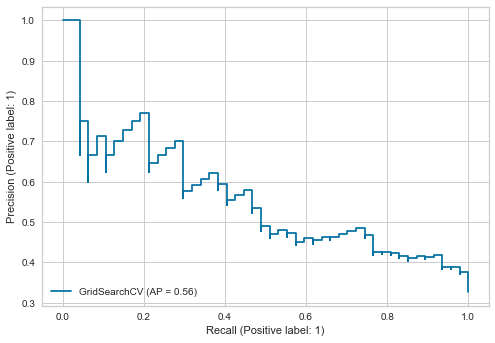

In [74]:
plot_precision_recall_curve(rf_grid_model, X_test, y_test);